In [1]:
# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # for adding Concolutional and densely-connected NN layers.

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels

# Visualization
import cv2 # for ingesting images
print('OpenCV: %s' % cv2.__version__) # print version
import matplotlib 
import matplotlib.pyplot as plt # for showing images
print('matplotlib: %s' % matplotlib.__version__) # print version

# Other utilities
import sys
import os

Tensorflow/Keras: 2.7.0
pandas: 1.3.4
numpy: 1.22.4
sklearn: 1.2.2
OpenCV: 4.8.0
matplotlib: 3.4.3


In [2]:
BASE_DIR = 'C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/caltech-101'

Next, we download and ingest Caltech 101 image data set. Note that we will only use four categories (“dalmatian”, “hedgehog”, “llama”, “panda”) in this example as opposed to all 101 species.

At the same time, we prep the data by resizing and standardising it, encoding labels and splitting it into train and test samples.

In [3]:
# List image categories we are interested in
LABELS = set(["dalmatian", "hedgehog", "llama","panda"])

In [4]:
# Create two lists to contain image paths and image labels
ImagePaths=[]
ListLabels=[]
for label in LABELS:
    for image in list(os.listdir(BASE_DIR+"/"+label)):
        ImagePaths=ImagePaths+[BASE_DIR+"/"+label+"/"+image]
        ListLabels=ListLabels+[label]

In [6]:
ImagePaths[0:10]

['C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/caltech-101/dalmatian/image_0001.jpg',
 'C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/caltech-101/dalmatian/image_0002.jpg',
 'C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/caltech-101/dalmatian/image_0003.jpg',
 'C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/caltech-101/dalmatian/image_0004.jpg',
 'C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/caltech-101/dalmatian/image_0005.jpg',
 'C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/caltech-101/dalmatian/image_0006.jpg',
 'C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/caltech-101/dalmatian/image_0007.jpg',
 'C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/caltech-101/dalmatian/image_0008.jpg',
 'C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Py

In [7]:
data = {'Species': ListLabels}

In [9]:
df = pd.DataFrame(data)
df

,Species
0,dalmatian
1,dalmatian
2,dalmatian
3,dalmatian
4,dalmatian
...,...
232,llama
233,llama
234,llama
235,llama


In [11]:
df.nunique()

Species    4
dtype: int64

In [12]:
df.value_counts()

Species  
llama        78
dalmatian    67
hedgehog     54
panda        38
dtype: int64

In [13]:
# Load images and resize to be a fixed 128x128 pixels, ignoring original aspect ratio
data=[]
for img in ImagePaths:
    image = cv2.imread(img)
    image = cv2.resize(image, (128, 128))
    data.append(image)

In [18]:
# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data = np.array(data, dtype="float") / 255.0

# 237 images of size 128*128 and 3 channels RGB color images. 

In [19]:
data.shape

(237, 128, 128, 3)

In [20]:
# Convert Labels list to numpy array
LabelsArray=np.array(ListLabels)

In [21]:
# Encode labels 
enc = OrdinalEncoder()
y=enc.fit_transform(LabelsArray.reshape(-1,1))

In [23]:
y.shape

(237, 1)

In [24]:
species, counts = np.unique(y, axis=0, return_counts=True)

In [26]:
#4 diferent species. 
species, counts

(array([[0.],
        [1.],
        [2.],
        [3.]]),
 array([67, 54, 78, 38], dtype=int64))

In [27]:
# ---- Create training and testing samples ---
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [28]:
# Print shapes
# Note, model input must have a four-dimensional shape [samples, rows, columns, channels]
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (189, 128, 128, 3)
Shape of y_train:  (189, 1)
Shape of X_test:  (48, 128, 128, 3)
Shape of y_test:  (48, 1)


# To better understand what data we are working with, let’s display a few input images.

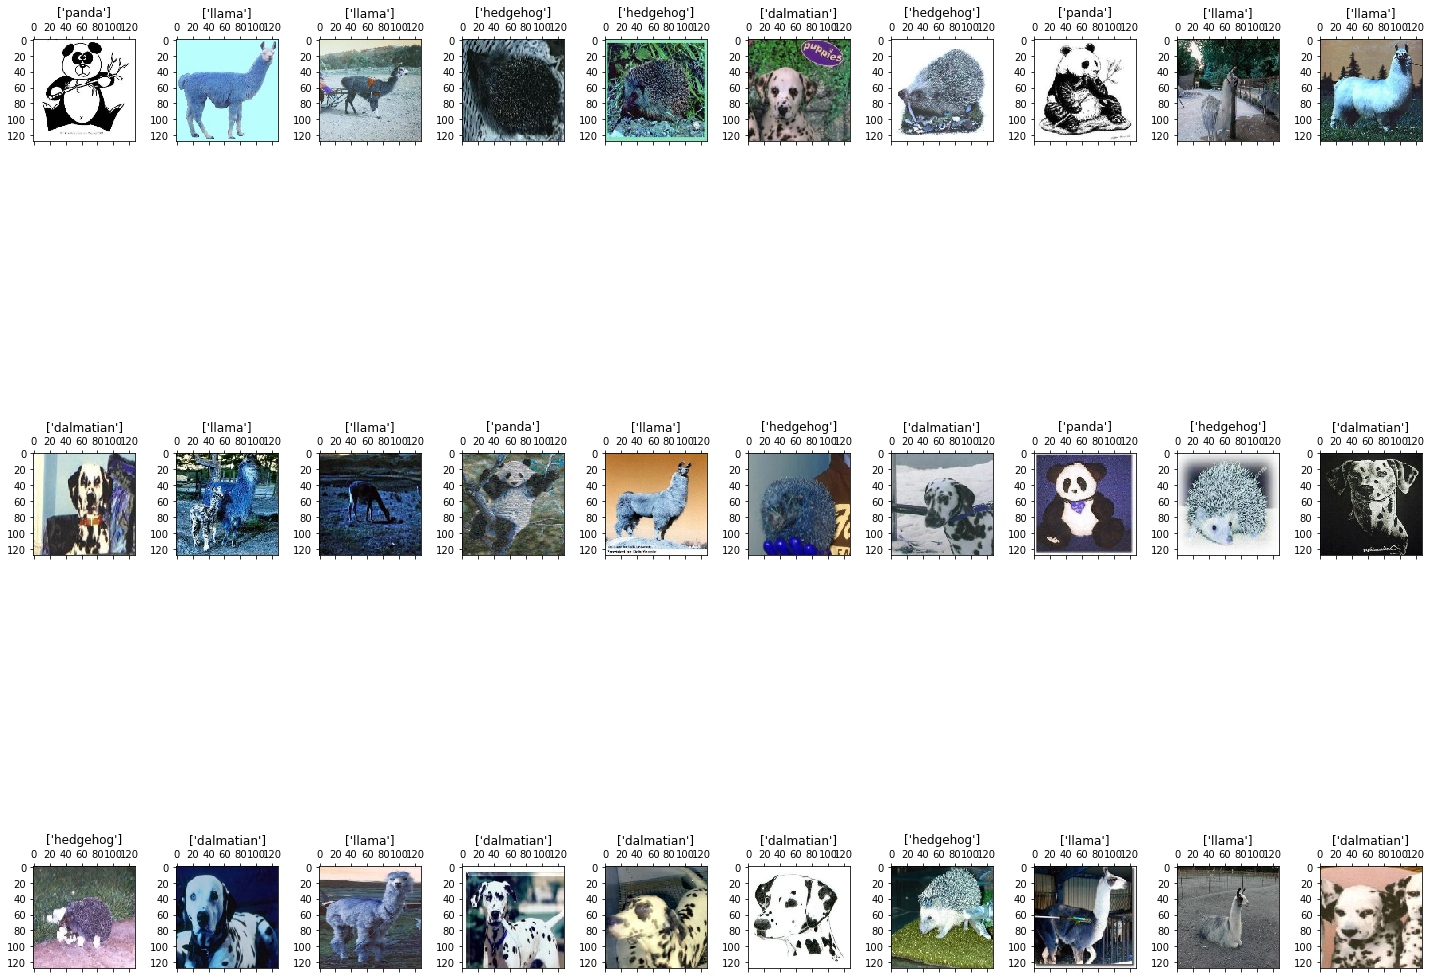

In [34]:
# Display images of 10 animals in the training set and their true labels
fig, axs = plt.subplots(3, 10, sharey=False, tight_layout=True, figsize=(20,20), facecolor='white')
n=0
for i in range(0,3):
    for j in range(0,10):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=enc.inverse_transform(y_train)[n])
        n=n+1
plt.show() 

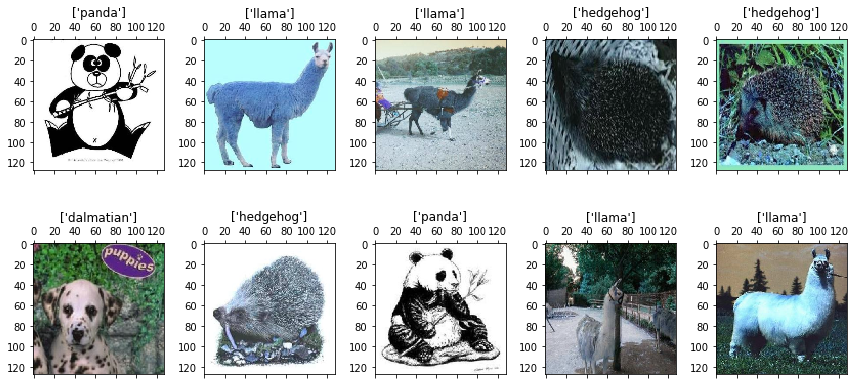

In [35]:
# Display images of 10 animals in the training set and their true labels
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=enc.inverse_transform(y_train)[n])
        n=n+1
plt.show() 

# I have structured the model to have multiple Convolutional, Pooling and Dropout layers to create a “deep” architecture. The initial Convolutional layers help extract low-level features, while later ones identify more high-level features.

# So the structure of my DCN model is:

# Input layer.The first set of Convolutional, Max Pooling and Dropout layers.The second set of Convolutional, Max Pooling and Dropout layers.The third set of Convolutional, Max Pooling and Dropout layers.Flatten layer.Dense Hidden layer.Output layer

Note that the Dropout layer randomly sets input units to 0 based on the rate we provided (in this case, 0.2). It means that a random 20% of inputs (features/nodes) will be set to zero and will not contribute meaningful weights to the model. The purpose of the Dropout layer is to help prevent overfitting.

Finally, note that I have listed all possible parameters in the first set of Convolutional and Max Pooling layers as I wanted to give you an easy reference to what you can change, so we do not need to explicitly list them every time (see the second and third set of Convolutional and Max Pooling layers).

In [36]:
#total of train images does not contribute to the input shape. 
X_train.shape[0]

189

# Specify the structure of a Neural Network

In [37]:
#--- Define a Model
model = Sequential(name="DCN-Model") # Model

# Input Layer 

In [38]:
#--- 
# Specify input shape [rows, columns, channels]
model.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs

# 3 convolutional layers of 16,64 and 64 feature maps with filters, kernel window, of size 3*3.

In [39]:
#16 feature maps or filters of size 3*3.
#--- First Set of Convolution, Max Pooling and Droput Layers (all parameters shown)
model.add(Conv2D(filters=16, # Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
                 kernel_size=(3,3), # An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
                 strides=(1,1), # Default=(1,1), An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.
                 padding='valid', # Default='valid', "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.
                 data_format=None, # Default=None, A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch_size, height, width, channels) while channels_first corresponds to inputs with shape (batch_size, channels,height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be channels_last.
                 dilation_rate=(1, 1), # Default=(1, 1), an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution. Can be a single integer to specify the same value for all spatial dimensions. Currently, specifying any dilation_rate value != 1 is incompatible with specifying any stride value != 1.
                 groups=1, # Default=1, A positive integer specifying the number of groups in which the input is split along the channel axis. Each group is convolved separately with filters / groups filters. The output is the concatenation of all the groups results along the channel axis. Input channels and filters must both be divisible by groups.
                 activation='relu', # Default=None, Activation function to use. If you don't specify anything, no activation is applied (see keras.activations).
                 use_bias=True, # Default=True. 
                 kernel_initializer='glorot_uniform', # Default='glorot_uniform', Initializer for the kernel weights matrix (htsee keras.initializers).
                 bias_initializer='zeros', # Default='zeros', Initializer for the bias vector (see keras.initializers).
                 kernel_regularizer=None, # Default=None, Regularizer function applied to the kernel weights matrix (see keras.regularizers).
                 bias_regularizer=None, # Default=None, Regularizer function applied to the bias vector (see keras.regularizers).
                 activity_regularizer=None, # Default=None, Regularizer function applied to the output of the layer (its "activation") (see keras.regularizers).
                 kernel_constraint=None, # Default=None, Constraint function applied to the kernel matrix (see keras.constraints).
                 bias_constraint=None, # Default=None, Constraint function applied to the bias vector (see keras.constraints).
                 name='2D-Convolutional-Layer-1')
         ) # Convolutional Layer, relu activation used

model.add(MaxPool2D(pool_size=(2,2), # Default=(2,2), integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.
                    strides=(2,2), # Default=None, Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. If None, it will default to pool_size.
                    padding='valid', # Default='valid', One of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
                    data_format=None, # Default=None, A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch, height, width, channels) while channels_first corresponds to inputs with shape (batch, channels, height, width). 
                    name='2D-MaxPool-Layer-1')
         ) # Max Pooling Layer,

model.add(Dropout(0.2, name='Dropout-Layer-1')) # Dropout Layer


#--- Second Set of Convolution, Max Pooling and Droput Layers 
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='2D-Convolutional-Layer-2')) # Convolutional Layer
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid', name='2D-MaxPool-Layer-2')) # Second Max Pooling Layer,
model.add(Dropout(0.2, name='Dropout-Layer-2')) # Dropout Layer


#--- Third Set of Convolution, Max Pooling and Droput Layers
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='2D-Convolutional-Layer-3')) # Convolutional Layer
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same', name='2D-MaxPool-Layer-3')) # Second Max Pooling Layer,
model.add(Dropout(0.2, name='Dropout-Layer-3')) # Dropout Layer

# Feed-Forward Densely Connected Layer and Output Layer 

In [40]:
#--- Feed-Forward Densely Connected Layer and Output Layer (note, flattening is required to convert from 2D to 1D shape)
model.add(Flatten(name='Flatten-Layer')) # Flatten the shape so we can feed it into a regular densely connected layer
model.add(Dense(16, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal')) # Hidden Layer, relu(x) = max(x, 0)
#multiclass classification we use the softmax activation. 
model.add(Dense(4, activation='softmax', name='Output-Layer')) # Output Layer, softmax(x) = exp(x) / tf.reduce_sum(exp(x))

# With the model structure specified, let’s compile it, train it and print the results.

Sparse Categorical Crossentropy is more efficient when you have a lot of categories or labels which would consume huge amount of RAM if one-hot encoded. 

In [41]:
##### Step 2 - Compile keras model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='SparseCategoricalCrossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['Accuracy'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )

In [42]:
##### Step 3 - Fit keras model on the dataset
history = model.fit(X_train, # input data
                    y_train, # target data
                    batch_size=1, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs=30, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose=0, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    callbacks=None, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                    validation_split=0.0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                    #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                    shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                    class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                    sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                    initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                    steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                    validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                    validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                    validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                    max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                    workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                    use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                   )

In [43]:
##### Step 4 - Use model to make predictions
# Note, we need to pass model output through argmax to convert from probability to label
# Also, we convert output from tensor to numpy array
# Predict class labels on training data
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train),axis=1))
# Predict class labels on a test data
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test),axis=1))

In [44]:
##### Step 5 - Model Performance Summary
print("")
print('------------------------- Model Summary -------------------------')
model.summary() # print model summary
print("")


------------------------- Model Summary -------------------------
Model: "DCN-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 2D-Convolutional-Layer-1 (C  (None, 126, 126, 16)     448       
 onv2D)                                                          
                                                                 
 2D-MaxPool-Layer-1 (MaxPool  (None, 63, 63, 16)       0         
 ing2D)                                                          
                                                                 
 Dropout-Layer-1 (Dropout)   (None, 63, 63, 16)        0         
                                                                 
 2D-Convolutional-Layer-2 (C  (None, 61, 61, 64)       9280      
 onv2D)                                                          
                                                                 
 2D-MaxPool-Layer-2 (MaxPool  (None, 30, 30, 64)       0

Since we chose validation_split=0.0 all parameters were trainable. 

In [45]:
print("")
print('------------------------- Encoded Names -------------------------')
for i in range(0,len(enc.categories_[0])):
    print(i,": ",enc.categories_[0][i])
print("")


------------------------- Encoded Names -------------------------
0 :  dalmatian
1 :  hedgehog
2 :  llama
3 :  panda



In [46]:
print('------------------ Evaluation on Training Data ------------------')
# Print the last value in the evaluation metrics contained within history file
for item in history.history:
    print("Final", item, ":", history.history[item][-1])
print("")

------------------ Evaluation on Training Data ------------------
Final loss : 0.0023620298597961664
Final Accuracy : 1.0



In [47]:
print('------------------ Classification_report on Training Data ------------------')
print(classification_report(y_train, pred_labels_tr))
print("")

------------------ Classification_report on Training Data ------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        55
         1.0       1.00      1.00      1.00        42
         2.0       1.00      1.00      1.00        63
         3.0       1.00      1.00      1.00        29

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189




In [48]:
# print('-------------------- Evaluation on Test Data --------------------')
print(classification_report(y_test, pred_labels_te))
print("")

              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72        12
         1.0       0.86      1.00      0.92        12
         2.0       0.81      0.87      0.84        15
         3.0       0.80      0.44      0.57         9

    accuracy                           0.79        48
   macro avg       0.79      0.77      0.76        48
weighted avg       0.79      0.79      0.78        48




# F1-score on test data > 70%: 80%

# There is an overfitting happening,100% score on training data and 80% on testing data, so it is worth experimenting with various parameters and network structures to find the best setup. At the same time

# The number of images we have is relatively small, making training and evaluation of the model much harder.

In [49]:
X_train.shape

(189, 128, 128, 3)

# Only 189 images for 4 different labels, species. 

# For this kind of images classification using CNN we need much more images in order to make accurate predictions.

# ---------------------------------------------------------------------------------------------------------------

# Additional evaluation

Let's take one image an make a prediction to check if the model got it right.

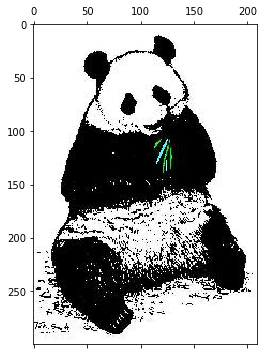

In [50]:
# Read in the image
panda = cv2.imread('C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/caltech-101/panda/image_0003.jpg')

# Display the image
plt.matshow(panda)
plt.show()

Prep the image and use the previously trained DCN model to predict the label.

In [51]:
# Resize 
panda = cv2.resize(panda, (128, 128))
panda.shape

(128, 128, 3)

In [52]:
# The current shape of mydog array is [rows, columns, channels].
# Add extra dimension to make it [samples, rows, columns, channels] that is required by the model
panda = panda[np.newaxis, ...]

In [53]:
# Print shape
print("Shape of the input: ", panda.shape)
print("")

Shape of the input:  (1, 128, 128, 3)



Right prediction! 

In [54]:
#----- Predict label of pandas image -----
# Note, we need to pass model output through argmax to convert from probability to label
# Also, we convert output from tensor to numpy array
# Finally, we do inverse transform to convert from encoded value to categorical label
pred_panda = enc.inverse_transform(np.array(tf.math.argmax(model.predict(panda),axis=1)).reshape(-1, 1))
print("DCN model prediction: ", pred_panda)

DCN model prediction:  [['panda']]


In [55]:
#----- Show Probabilities of each prediction -----
pred_probs=model.predict(panda)

In [56]:
pred_probs

array([[0., 0., 0., 1.]], dtype=float32)

In [57]:
# Print in a nice format with label and probability next to each other
print("")
print("Probabilities for each category:")
for i in range(0,len(enc.categories_[0])):
    print(enc.categories_[0][i], " : ", pred_probs[0][i])


Probabilities for each category:
dalmatian  :  0.0
hedgehog  :  0.0
llama  :  0.0
panda  :  1.0


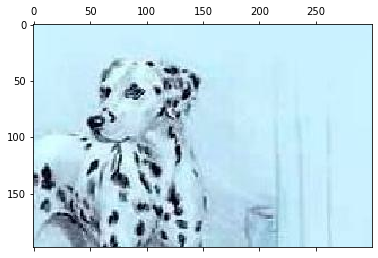

In [58]:
# Read in the image
dalmatian = cv2.imread('C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/caltech-101/dalmatian/image_0019.jpg')
# Display the image
plt.matshow(dalmatian)
plt.show()

In [59]:
dalmatian = cv2.resize(dalmatian, (128, 128))

In [60]:
# Standardize (divide by 255 since RGB values ranges from 0 to 255)
dalmatian = dalmatian / 255.0

In [61]:
# The current shape of mydog array is [rows, columns, channels].
# Add extra dimension to make it [samples, rows, columns, channels] that is required by the model
dalmatian = dalmatian[np.newaxis, ...]

In [62]:
# Print shape
print("Shape of the input: ", dalmatian.shape)
print("")

Shape of the input:  (1, 128, 128, 3)



Wrong prediction: In this case the model predict hedgehog with a probability of 81%.

In [63]:
#----- Predict label of dalmatian image -----
# Note, we need to pass model output through argmax to convert from probability to label
# Also, we convert output from tensor to numpy array
# Finally, we do inverse transform to convert from encoded value to categorical label
pred_dalmatian = enc.inverse_transform(np.array(tf.math.argmax(model.predict(dalmatian),axis=1)).reshape(-1, 1))
print("DCN model prediction: ", pred_dalmatian)

DCN model prediction:  [['hedgehog']]


In [64]:
#----- Show Probabilities of each prediction -----
pred_probs=model.predict(dalmatian)

In [65]:
# Print in a nice format with label and probability next to each other
print("")
print("Probabilities for each category:")
for i in range(0,len(enc.categories_[0])):
    print(enc.categories_[0][i], " : ", pred_probs[0][i])


Probabilities for each category:
dalmatian  :  0.18791983
hedgehog  :  0.8102393
llama  :  0.0018321931
panda  :  8.625704e-06


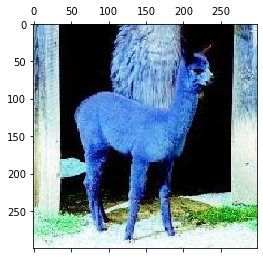

In [67]:
# Read in the image
Llama = cv2.imread('C:/Users/Admin/Machine Learning chapter 5/Deep Learning basics with Python/caltech-101/llama/image_0023.jpg')
# Display the image
plt.matshow(Llama)
plt.show()

In [68]:
# Resize 
llama = cv2.resize(Llama, (128, 128))

In [69]:
# Standardize (divide by 255 since RGB values ranges from 0 to 255)
llama = llama / 255.0

In [70]:
# The current shape of mydog array is [rows, columns, channels].
# Add extra dimension to make it [samples, rows, columns, channels] that is required by the model
llama = llama[np.newaxis, ...]

In [71]:
# Print shape
print("Shape of the input: ", llama.shape)
print("")

Shape of the input:  (1, 128, 128, 3)



Right prediction! 

In [72]:
#----- Predict label of dalmatian image -----
# Note, we need to pass model output through argmax to convert from probability to label
# Also, we convert output from tensor to numpy array
# Finally, we do inverse transform to convert from encoded value to categorical label
pred_llama = enc.inverse_transform(np.array(tf.math.argmax(model.predict(llama),axis=1)).reshape(-1, 1))
print("DCN model prediction: ", pred_llama)

DCN model prediction:  [['llama']]


In [73]:
#----- Show Probabilities of each prediction -----
pred_probs=model.predict(llama)

In [74]:
# Print in a nice format with label and probability next to each other
print("")
print("Probabilities for each category:")
for i in range(0,len(enc.categories_[0])):
    print(enc.categories_[0][i], " : ", pred_probs[0][i])


Probabilities for each category:
dalmatian  :  3.4347138e-09
hedgehog  :  4.9362724e-16
llama  :  1.0
panda  :  2.4470203e-22
